In [96]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [130]:
# Helper functions

from statsmodels.tsa.arima.model import ARIMA

# resource for grid searching ARIMA
# https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = np.sqrt(mean_squared_error(test, predictions))
    df = pd.DataFrame(test)
    df['preds'] = predictions
    df.plot(y=['new_cases', 'preds'])
    plt.legend(['train', 'train_pred'])
    return rmse
 
    
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                #print(order)
                rmse = evaluate_arima_model(train, test, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
            
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
USa

In [157]:
# Importing data

USA_train_imputed = pd.read_csv('USA_train_imputed.csv')
USA_test_imputed = pd.read_csv('USA_test_imputed.csv')
USA_train_imputed['date'] = pd.to_datetime(USA_train_imputed['date'])
USA_train_imputed['Weekend'] = USA_train_imputed['date'].dt.dayofweek > 4 
USA_test_imputed['date'] = pd.to_datetime(USA_test_imputed['date'])
USA_test_imputed['Weekend'] = USA_test_imputed['date'].dt.dayofweek > 4 
USA_train_imputed = USA_train_imputed.set_index('date')
USA_test_imputed = USA_test_imputed.set_index('date')

China_train_imputed = pd.read_csv('China_train_imputed.csv')
China_test_imputed = pd.read_csv('China_test_imputed.csv')
China_train_imputed['date'] = pd.to_datetime(China_train_imputed['date'])
China_train_imputed['Weekend'] = China_train_imputed['date'].dt.dayofweek > 4 
China_test_imputed['date'] = pd.to_datetime(China_test_imputed['date'])
China_test_imputed['Weekend'] = China_test_imputed['date'].dt.dayofweek > 4 
China_train_imputed = China_train_imputed.set_index('date')
China_test_imputed = China_test_imputed.set_index('date')

Brazil_train_imputed = pd.read_csv('Brazil_train_imputed.csv')
Brazil_test_imputed = pd.read_csv('Brazil_test_imputed.csv')
Brazil_train_imputed['date'] = pd.to_datetime(Brazil_train_imputed['date'])
Brazil_train_imputed['Weekend'] = Brazil_train_imputed['date'].dt.dayofweek > 4 
Brazil_test_imputed['date'] = pd.to_datetime(Brazil_test_imputed['date'])
Brazil_test_imputed['Weekend'] = Brazil_test_imputed['date'].dt.dayofweek > 4 
Brazil_train_imputed = Brazil_train_imputed.set_index('date')
Brazil_test_imputed = Brazil_test_imputed.set_index('date')

Germany_train_imputed = pd.read_csv('Germany_train_imputed.csv')
Germany_test_imputed = pd.read_csv('Germany_test_imputed.csv')
Germany_train_imputed['date'] = pd.to_datetime(Germany_train_imputed['date'])
Germany_train_imputed['Weekend'] = Germany_train_imputed['date'].dt.dayofweek > 4 
Germany_test_imputed['date'] = pd.to_datetime(Germany_test_imputed['date'])
Germany_test_imputed['Weekend'] = Germany_test_imputed['date'].dt.dayofweek > 4 
Germany_train_imputed = Germany_train_imputed.set_index('date')
Germany_test_imputed = Germany_test_imputed.set_index('date')

Nigeria_train_imputed = pd.read_csv('Nigeria_train_imputed.csv')
Nigeria_test_imputed = pd.read_csv('Nigeria_test_imputed.csv')
Nigeria_train_imputed['date'] = pd.to_datetime(Nigeria_train_imputed['date'])
Nigeria_train_imputed['Weekend'] = Nigeria_train_imputed['date'].dt.dayofweek > 4 
Nigeria_test_imputed['date'] = pd.to_datetime(Nigeria_test_imputed['date'])
Nigeria_test_imputed['Weekend'] = Nigeria_test_imputed['date'].dt.dayofweek > 4 
Nigeria_train_imputed = Nigeria_train_imputed.set_index('date')
Nigeria_test_imputed = Nigeria_test_imputed.set_index('date')

Australia_train_imputed = pd.read_csv('Australia_train_imputed.csv')
Australia_test_imputed = pd.read_csv('Australia_test_imputed.csv')
Australia_train_imputed['date'] = pd.to_datetime(Australia_train_imputed['date'])
Australia_train_imputed['Weekend'] = Australia_train_imputed['date'].dt.dayofweek > 4 
Australia_test_imputed['date'] = pd.to_datetime(Australia_test_imputed['date'])
Australia_test_imputed['Weekend'] = Australia_test_imputed['date'].dt.dayofweek > 4 
Australia_train_imputed = Australia_train_imputed.set_index('date')
Australia_test_imputed = Australia_test_imputed.set_index('date')

In [44]:
USA_test_imputed

,iso_code,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,hospital_beds_per_thousand,life_expectancy,...,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed_per_hundred,new_people_vaccinated_smoothed,new_vaccinations_smoothed_per_million,new_cases_Lag_7,new_cases_Lag_14,Rolling_Mean_new_cases,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,516133833.0,98735.0,1067950.0,0.086,284705.0,3217.0,NaN,NaN,NaN,True
2022-01-02,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,516623646.0,489813.0,1070364.0,0.086,285435.0,3224.0,NaN,NaN,NaN,True
2022-01-03,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,517839306.0,1215660.0,1029522.0,0.084,277934.0,3101.0,NaN,NaN,NaN,False
2022-01-04,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,519224451.0,1385145.0,990188.0,0.081,269284.0,2982.0,NaN,NaN,NaN,False
2022-01-05,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,520638353.0,1413902.0,957393.0,0.079,261430.0,2884.0,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,554475530.0,241635.0,264689.0,0.021,69472.0,797.0,91197.0,116035.0,73498.571429,False
2022-03-02,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,554692730.0,217200.0,250409.0,0.020,65798.0,754.0,83901.0,116111.0,68944.571429,False
2022-03-03,USA,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,2.77,78.86,...,554842009.0,149279.0,228576.0,0.018,60181.0,688.0,67349.0,102061.0,65389.642857,False


# USA

## Auto-ARIMA

In [115]:
import warnings
warnings.filterwarnings("ignore")

USA_train_new_cases = USA_train_imputed['new_cases']
USA_test_new_cases = USA_test_imputed['new_cases']

USA_AA = auto_arima(USA_train_new_cases, start_p=1, start_q=1,
                           max_p=100, 
                           max_q=100, 
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(USA_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16881.345, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17095.960, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16997.151, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16880.961, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17094.167, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16880.193, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16842.508, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16841.921, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16863.499, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16843.334, Time=0.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16698.721, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16858.933, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16703.957, Time=0.86 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=16706.252, Time=0.94 sec
 ARIMA(1,1,4)(0,0,0

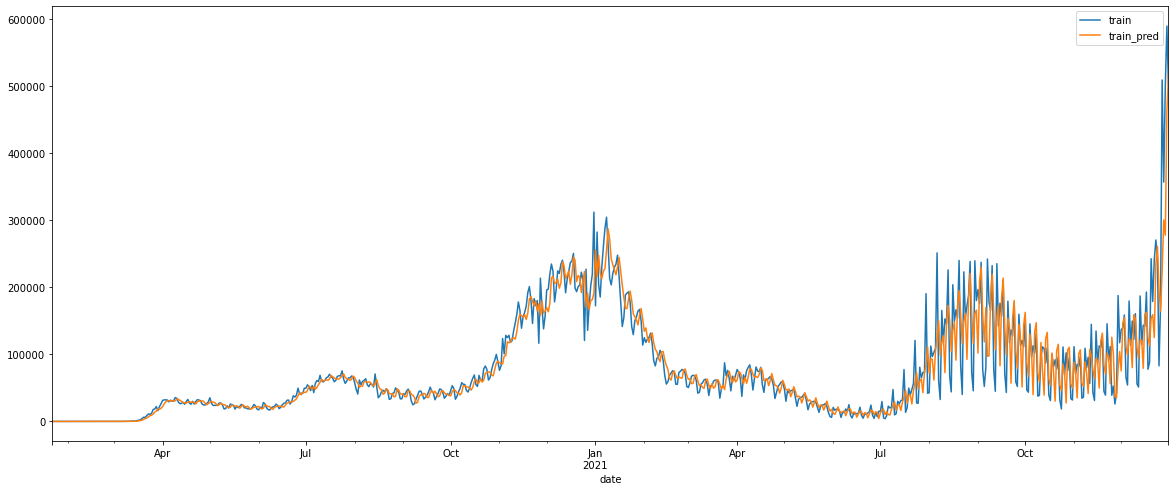

In [55]:
USA_AA_train_pred = USA_AA.fittedvalues()
pd.concat([USA_train_new_cases, USA_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

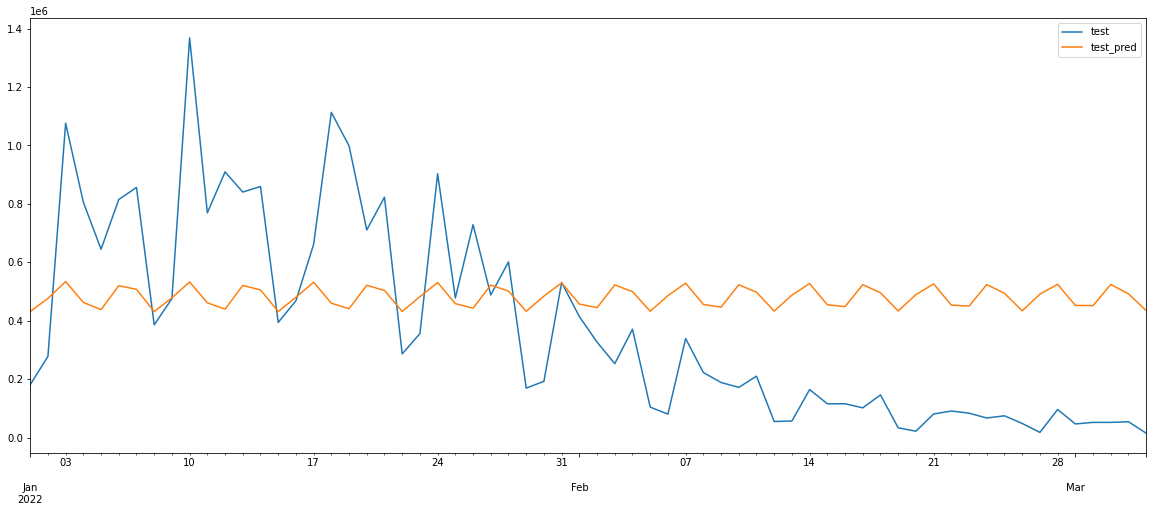

In [156]:
USA_AA_test_pred = USA_AA.predict(n_periods=len(USA_test_new_cases))

pd.concat([USA_test_new_cases, USA_AA_test_pred], axis=1).plot(figsize=(20,8))
plt.legend(['test', 'test_pred'])

In [58]:
USA_AA_RMSE = np.sqrt(mean_squared_error(USA_test_new_cases, USA_AA_test_pred))
USA_AA_RMSE

347852.8938136566

## ARIMA

ARIMA(10, 0, 0) RMSE=188306.554
Best ARIMA(10, 0, 0) RMSE=188306.554


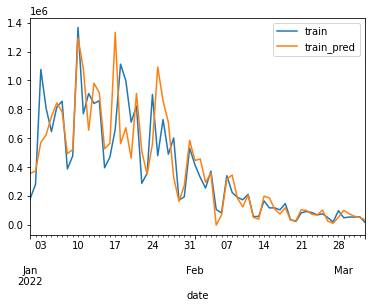

In [131]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(USA_train_new_cases, USA_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [158]:
from sklearn.preprocessing import StandardScaler

x_train_USA = USA_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_USA = USA_train_imputed['new_cases']
x_test_USA = USA_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_USA = USA_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_USA)
x_train_USA_scaled = scaler.transform(x_train_USA)
x_test_USA_scaled = scaler.transform(x_test_USA)

In [159]:
USA_XGB = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
USA_XGB.fit(x_train_USA_scaled, y_train_USA)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

192678.43315681504


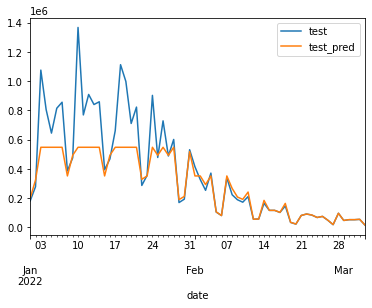

In [162]:
USA_XGB_pred = USA_XGB.predict(x_test_USA_scaled)
RMSE = np.sqrt(mean_squared_error(USA_XGB_pred, y_test_USA))
print(RMSE)


df_USA = pd.DataFrame(y_test_USA)
df_USA['preds'] = USA_XGB_pred
df_USA.plot(y=['new_cases', 'preds'])
plt.legend(['test', 'test_pred'])

# Germany

## Auto-ARIMA

In [57]:
Germany_train_new_cases = Germany_train_imputed['new_cases']
Germany_test_new_cases = Germany_test_imputed['new_cases']

Germany_AA = auto_arima(Germany_train_new_cases, start_p=1, start_q=1,
                           max_p=100, 
                           max_q=100, 
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(Germany_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14618.308, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14837.939, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14754.978, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14644.330, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14835.948, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14613.164, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14752.138, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14545.170, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14711.267, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=14454.180, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=14605.192, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=14365.732, Time=0.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=14446.498, Time=0.21 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=14307.828, Time=0.72 sec
 ARIMA(6,1,0)(0,0,0

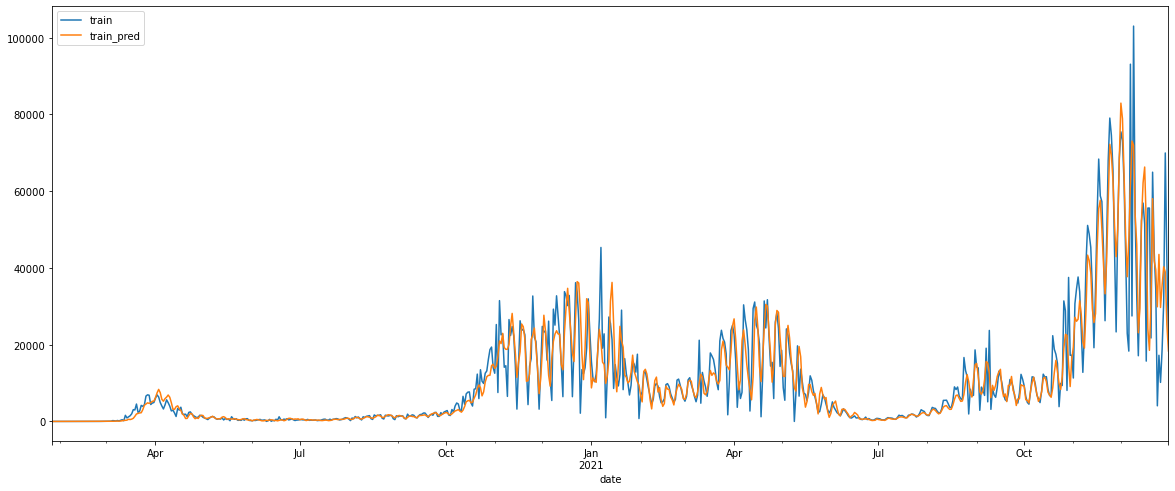

In [63]:
Germany_AA_train_pred = Germany_AA.fittedvalues()
pd.concat([Germany_train_new_cases, Germany_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

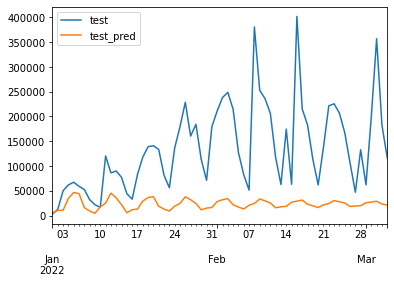

In [64]:
Germany_AA_test_pred = Germany_AA.predict(n_periods=len(Germany_test_new_cases))
pd.concat([Germany_test_new_cases, Germany_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [65]:
Germany_AA_RMSE = np.sqrt(mean_squared_error(Germany_test_new_cases, Germany_AA_test_pred))
Germany_AA_RMSE

139441.2990206457

## ARIMA

ARIMA(10, 0, 0) RMSE=59671.361
Best ARIMA(10, 0, 0) RMSE=59671.361


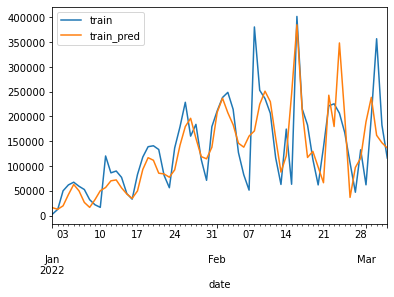

In [132]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Germany_train_new_cases, Germany_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [146]:
x_train_Germany = Germany_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Germany = Germany_train_imputed['new_cases']
x_test_Germany = Germany_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Germany = Germany_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Germany)
x_train_Germany_scaled = scaler.transform(x_train_Germany)
x_test_Germany_scaled = scaler.transform(x_test_Germany)

In [151]:
Germany_XGB = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
Germany_XGB.fit(x_train_Germany_scaled, y_train_Germany)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

90922.99712818662


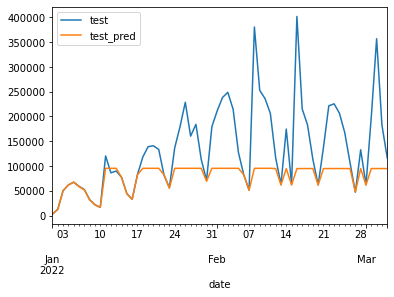

In [163]:
Germany_XGB_pred = Germany_XGB.predict(x_test_Germany_scaled)
RMSE = np.sqrt(mean_squared_error(Germany_XGB_pred, y_test_Germany))
print(RMSE)


df_Germany = pd.DataFrame(y_test_Germany)
df_Germany['preds'] = Germany_XGB_pred
df_Germany.plot(y=['new_cases', 'preds'])
plt.legend(['test', 'test_pred'])

# Brazil

## Auto-ARIMA

In [62]:
Brazil_train_new_cases = Brazil_train_imputed['new_cases']
Brazil_test_new_cases = Brazil_test_imputed['new_cases']

Brazil_AA = auto_arima(Brazil_train_new_cases, start_p=1, start_q=1,
                           max_p=100, 
                           max_q=100, 
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(Brazil_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14623.610, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14772.521, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14774.195, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14773.685, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14770.523, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14535.725, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14715.568, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14518.969, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14685.393, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=14452.542, Time=0.42 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=14626.238, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=14274.020, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=14363.342, Time=0.18 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=14156.890, Time=0.85 sec
 ARIMA(6,1,0)(0,0,0

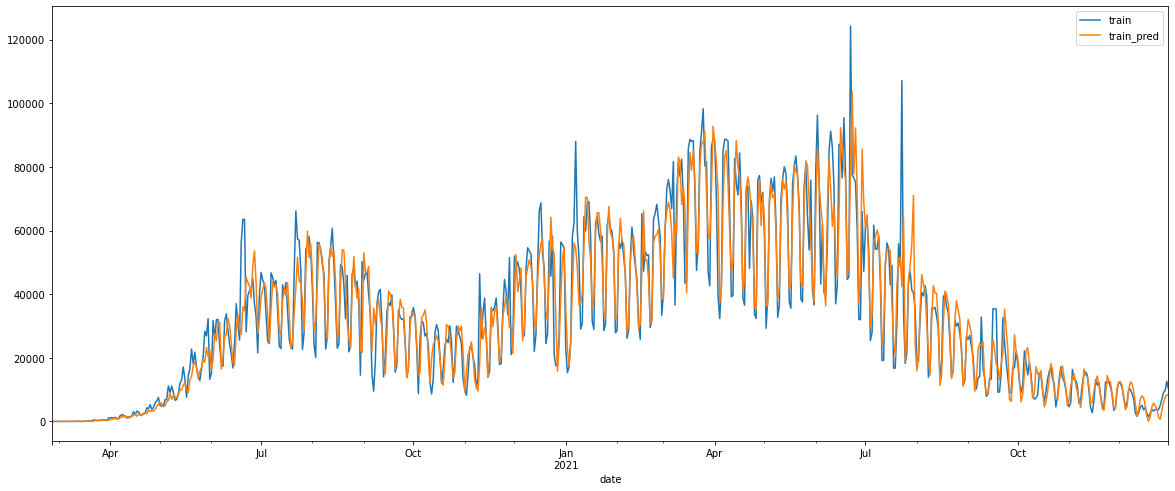

In [66]:
Brazil_AA_train_pred = Brazil_AA.fittedvalues()
pd.concat([Brazil_train_new_cases, Brazil_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

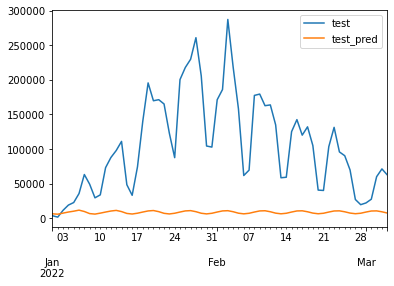

In [67]:
Brazil_AA_test_pred = Brazil_AA.predict(n_periods=len(Brazil_test_new_cases))
pd.concat([Brazil_test_new_cases, Brazil_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [68]:
Brazil_AA_RMSE = np.sqrt(mean_squared_error(Brazil_test_new_cases, Brazil_AA_test_pred))
Brazil_AA_RMSE

117925.85049235162

## ARIMA

ARIMA(10, 0, 0) RMSE=31840.476
Best ARIMA(10, 0, 0) RMSE=31840.476


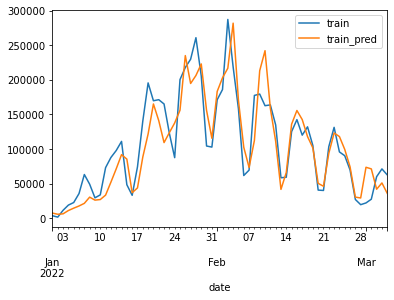

In [133]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Brazil_train_new_cases, Brazil_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [147]:
x_train_Brazil = Brazil_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Brazil = Brazil_train_imputed['new_cases']
x_test_Brazil = Brazil_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Brazil = Brazil_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Brazil)
x_train_Brazil_scaled = scaler.transform(x_train_Brazil)
x_test_Brazil_scaled = scaler.transform(x_test_Brazil)

In [169]:
Brazil_XGB = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
Brazil_XGB.fit(x_train_Brazil_scaled, y_train_Brazil)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

47256.14977932331


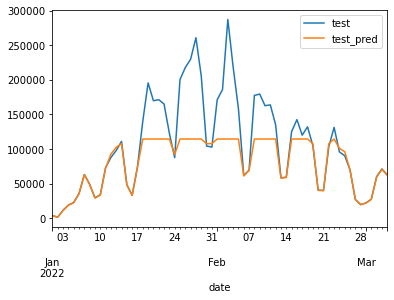

In [170]:
Brazil_XGB_pred = Brazil_XGB.predict(x_test_Brazil_scaled)
RMSE = np.sqrt(mean_squared_error(Brazil_XGB_pred, y_test_Brazil))
print(RMSE)


df_Brazil = pd.DataFrame(y_test_Brazil)
df_Brazil['preds'] = Brazil_XGB_pred
df_Brazil.plot(y=['new_cases', 'preds'])
plt.legend(['test', 'test_pred'])

# China

## Auto-ARIMA

In [69]:
China_train_new_cases = China_train_imputed['new_cases']
China_test_new_cases = China_test_imputed['new_cases']

China_AA = auto_arima(China_train_new_cases, start_p=1, start_q=1,
                           max_p=100, 
                           max_q=100, 
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(China_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11052.371, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11297.570, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11193.852, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11057.824, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11295.571, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11048.677, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11111.966, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11050.673, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11049.882, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11048.991, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11078.309, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11050.349, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11046.681, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11050.383, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0

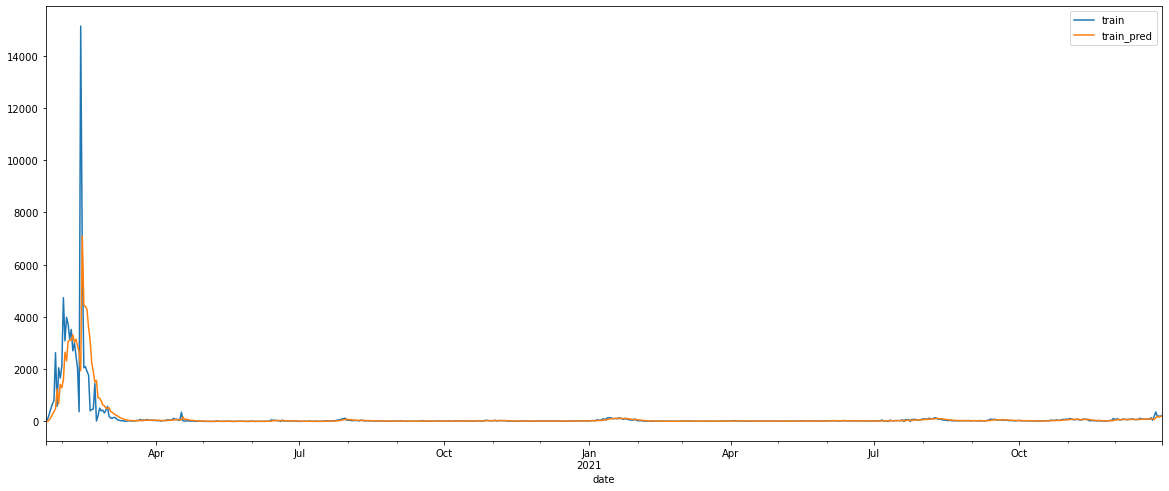

In [70]:
China_AA_train_pred = China_AA.fittedvalues()
pd.concat([China_train_new_cases, China_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

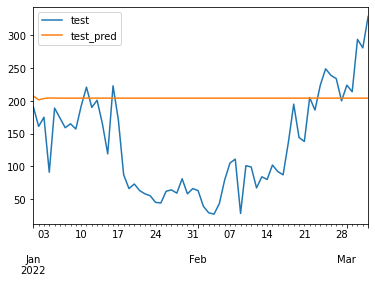

In [71]:
China_AA_test_pred = China_AA.predict(n_periods=len(China_test_new_cases))
pd.concat([China_test_new_cases, China_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [72]:
China_AA_RMSE = np.sqrt(mean_squared_error(China_test_new_cases, China_AA_test_pred))
China_AA_RMSE

102.32010146597536

## ARIMA

ARIMA(10, 0, 0) RMSE=41.638
Best ARIMA(10, 0, 0) RMSE=41.638


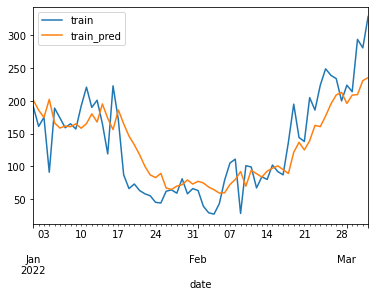

In [134]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(China_train_new_cases, China_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [148]:
x_train_China = China_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_China = China_train_imputed['new_cases']
x_test_China = China_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_China = China_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_China)
x_train_China_scaled = scaler.transform(x_train_China)
x_test_China_scaled = scaler.transform(x_test_China)

In [153]:
China_XGB = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
China_XGB.fit(x_train_China_scaled, y_train_China)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

8.899625808701659


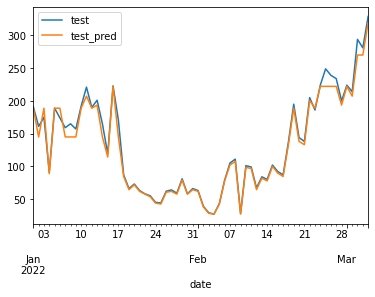

In [171]:
China_XGB_pred = China_XGB.predict(x_test_China_scaled)
RMSE = np.sqrt(mean_squared_error(China_XGB_pred, y_test_China))
print(RMSE)


df_China = pd.DataFrame(y_test_China)
df_China['preds'] = China_XGB_pred
df_China.plot(y=['new_cases', 'preds'])
plt.legend(['test', 'test_pred'])

# Nigeria

## Auto-ARIMA

In [73]:
Nigeria_train_new_cases = Nigeria_train_imputed['new_cases']
Nigeria_test_new_cases = Nigeria_test_imputed['new_cases']

Nigeria_AA = auto_arima(Nigeria_train_new_cases, start_p=1, start_q=1,
                           max_p=100, 
                           max_q=100, 
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(Nigeria_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9562.825, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9930.209, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9710.027, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9567.321, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9928.210, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9564.258, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9569.258, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9562.495, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9564.387, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9564.976, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9560.781, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9565.684, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9567.623, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=9562.664, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]          

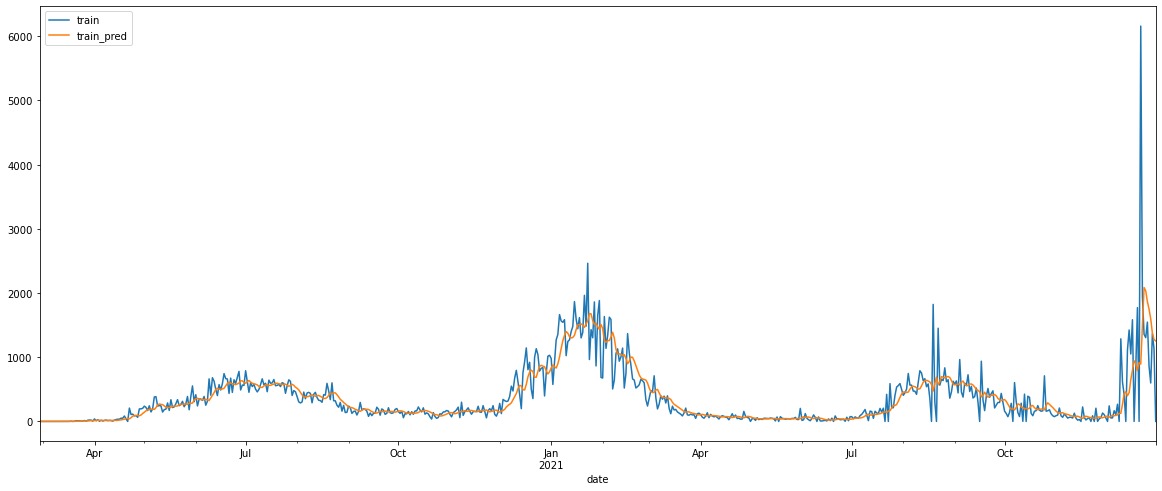

In [74]:
Nigeria_AA_train_pred = Nigeria_AA.fittedvalues()
pd.concat([Nigeria_train_new_cases, Nigeria_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

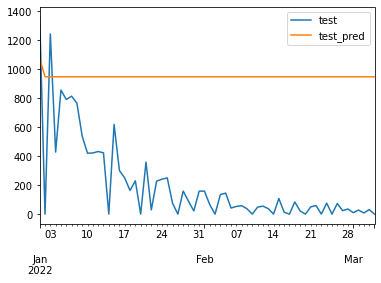

In [75]:
Nigeria_AA_test_pred = Nigeria_AA.predict(n_periods=len(Nigeria_test_new_cases))
pd.concat([Nigeria_test_new_cases, Nigeria_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [76]:
Nigeria_AA_RMSE = np.sqrt(mean_squared_error(Nigeria_test_new_cases, Nigeria_AA_test_pred))
Nigeria_AA_RMSE

798.6282447743923

## ARIMA

ARIMA(10, 0, 0) RMSE=210.493
Best ARIMA(10, 0, 0) RMSE=210.493


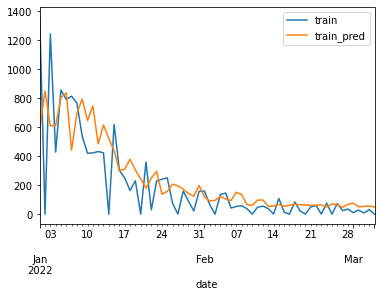

In [135]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Nigeria_train_new_cases, Nigeria_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [149]:
x_train_Nigeria = Nigeria_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Nigeria = Nigeria_train_imputed['new_cases']
x_test_Nigeria = Nigeria_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Nigeria = Nigeria_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Nigeria)
x_train_Nigeria_scaled = scaler.transform(x_train_Nigeria)
x_test_Nigeria_scaled = scaler.transform(x_test_Nigeria)

In [154]:
Nigeria_XGB = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
Nigeria_XGB.fit(x_train_Nigeria_scaled, y_train_Nigeria)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

3.6003649190318363


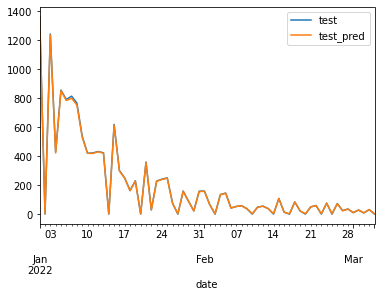

In [173]:
Nigeria_XGB_pred = Nigeria_XGB.predict(x_test_Nigeria_scaled)
RMSE = np.sqrt(mean_squared_error(Nigeria_XGB_pred, y_test_Nigeria))
print(RMSE)


df_Nigeria = pd.DataFrame(y_test_Nigeria)
df_Nigeria['preds'] = Nigeria_XGB_pred
df_Nigeria.plot(y=['new_cases', 'preds'])
plt.legend(['test', 'test_pred'])

# Australia

## Auto-ARIMA

In [81]:
Australia_train_new_cases = Australia_train_imputed['new_cases']
Australia_test_new_cases = Australia_test_imputed['new_cases']

Australia_AA = auto_arima(Australia_train_new_cases, start_p=1, start_q=1,
                           max_p=100, 
                           max_q=100, 
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(Australia_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10959.149, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10981.181, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10965.742, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10972.387, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10983.032, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10696.094, Time=0.74 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10693.124, Time=0.70 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10622.636, Time=0.93 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=10502.328, Time=0.92 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=10435.529, Time=1.16 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=i

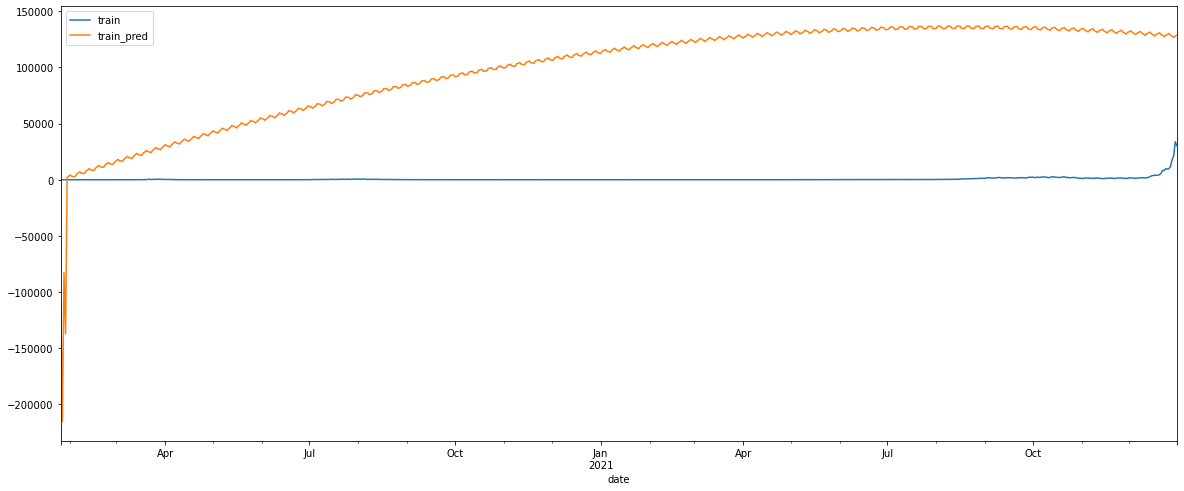

In [82]:
Australia_AA_train_pred = Australia_AA.fittedvalues()
pd.concat([Australia_train_new_cases, Australia_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

In [85]:
print(Australia_AA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  706
Model:               SARIMAX(7, 1, 3)   Log Likelihood                 -70.225
Date:                Sun, 12 Nov 2023   AIC                            164.450
Time:                        18:13:15   BIC                            219.149
Sample:                    01-26-2020   HQIC                           185.587
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.3023   6.78e-05   -9.3e+04      0.000      -6.302      -6.302
ar.L1         -0.6545    4.8e-05  -1.36e+04      0.000      -0.655      -0.654
ar.L2          0.6695   7.59e-05   8819.785      0.0

In [83]:
Australia_AA_test_pred = Australia_AA.predict()
pd.concat([Australia_test_new_cases, Australia_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [86]:
Australia_AA_RMSE = np.sqrt(mean_squared_error(Australia_test_new_cases, Australia_AA_test_pred))
Australia_AA_RMSE

NameError: name 'Australia_AA_test_pred' is not defined

## ARIMA

In [136]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Australia_train_new_cases, Australia_test_new_cases, p_values, d_values, q_values)

LinAlgError: LU decomposition error.

## XGBOOST

In [150]:
x_train_Aus = Australia_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Aus = Australia_train_imputed['new_cases']
x_test_Aus = Australia_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Aus = Australia_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Aus)
x_train_Aus_scaled = scaler.transform(x_train_Aus)
x_test_Aus_scaled = scaler.transform(x_test_Aus)

In [155]:
Aus_XGB = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
Aus_XGB.fit(x_train_Aus_scaled, y_train_Aus)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

35314.61551004963


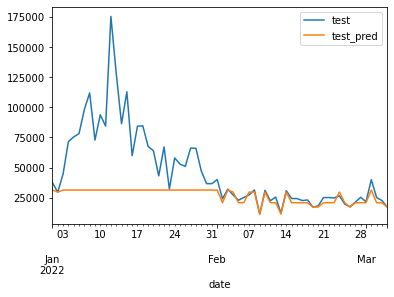

In [174]:
Aus_XGB_pred = Aus_XGB.predict(x_test_Aus_scaled)
RMSE = np.sqrt(mean_squared_error(Aus_XGB_pred, y_test_Aus))
print(RMSE)


df_Aus = pd.DataFrame(y_test_Aus)
df_Aus['preds'] = Aus_XGB_pred
df_Aus.plot(y=['new_cases', 'preds'])
plt.legend(['test', 'test_pred'])

# Summary

USA

- Auto-Arima: 347852.8938136566
- ARIMA: 188306.554
- XGB: 192678.43315681504

Germany

- Auto-ARIMA: 139441.2990206457
- ARIMA: 59671.361
- XGB: 90922.99712818662

Brazil

- Auto-ARIMA: 117925.85049235162
- ARIMA: 31840.476
- XGB: 47256.14977932331

China

- Auto-ARIMA: 102.32010146597536
- ARIMA: 41.638
- XGB: 8.899625808701659

Nigeria 

- Auto-ARIMA: 798.6282447743923
- ARIMA: 210.493
- XGB: 3.6003649190318363

Australia

- Auto-ARIMA:
- ARIMA:
- XGB: 35314.61551004963